In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("output_2025_01_21_14_18_PCA-32_50000bp_hg38_post_processed.pq")
subset=df[["filename", "bin_name", "PCA1"]].dropna()

In [13]:
def correlation_heatmaps(df, index="bin_name", value_col="PCA1", group_col="filename"):
    """
    • Groups the dataframe on *group_col*  
    • Computes Pearson & Spearman correlations of *value_col* between groups  
    • Draws two separate heat‑maps (one per correlation type)  
    Returns the two correlation matrices.
    """
    # --- reshape to wide form ------------------------------------------------
    tmp = df.copy()
    tmp["row_in_group"] = tmp.groupby(group_col).cumcount()      # 0,1,2… within each filename
    wide = tmp.pivot(index=index, columns=group_col, values=value_col)

    # --- correlation matrices -----------------------------------------------
    pearson  = wide.corr(method="pearson")
    spearman = wide.corr(method="spearman")

    # --- helper for a single heat‑map ---------------------------------------
    def _plot(corr, title, filename=None):
        fig, ax = plt.subplots(figsize=(12,12))
        im = ax.imshow(corr, vmin=0.75, vmax=1) 
        ax.set_xticks(range(len(corr.columns)))
        ax.set_yticks(range(len(corr.index)))
        ax.set_xticklabels(corr.columns, rotation=90)
        ax.set_yticklabels(corr.index)
        ax.set_title(title)
        fig.colorbar(im)
        plt.tight_layout()
        if filename is not None:
            plt.savefig(filename)

    _plot(pearson,  f"Pearson correlation of {value_col} by {group_col}", filename="heatmap-pearson.pdf")
    _plot(spearman, f"Spearman correlation of {value_col} by {group_col}", filename="heatmap-spearman.pdf")

    return pearson, spearman

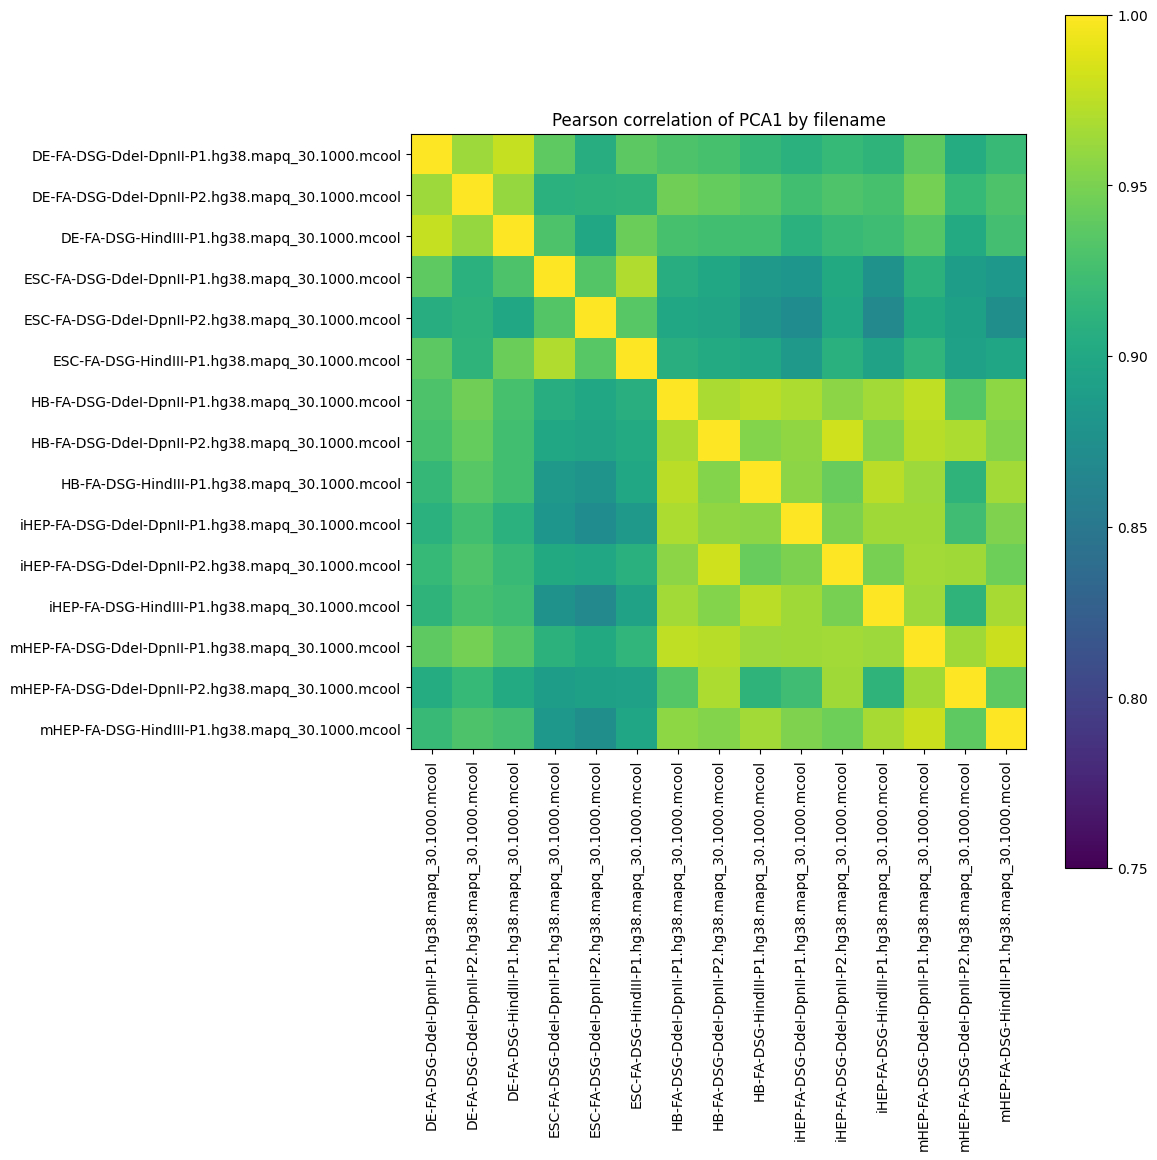

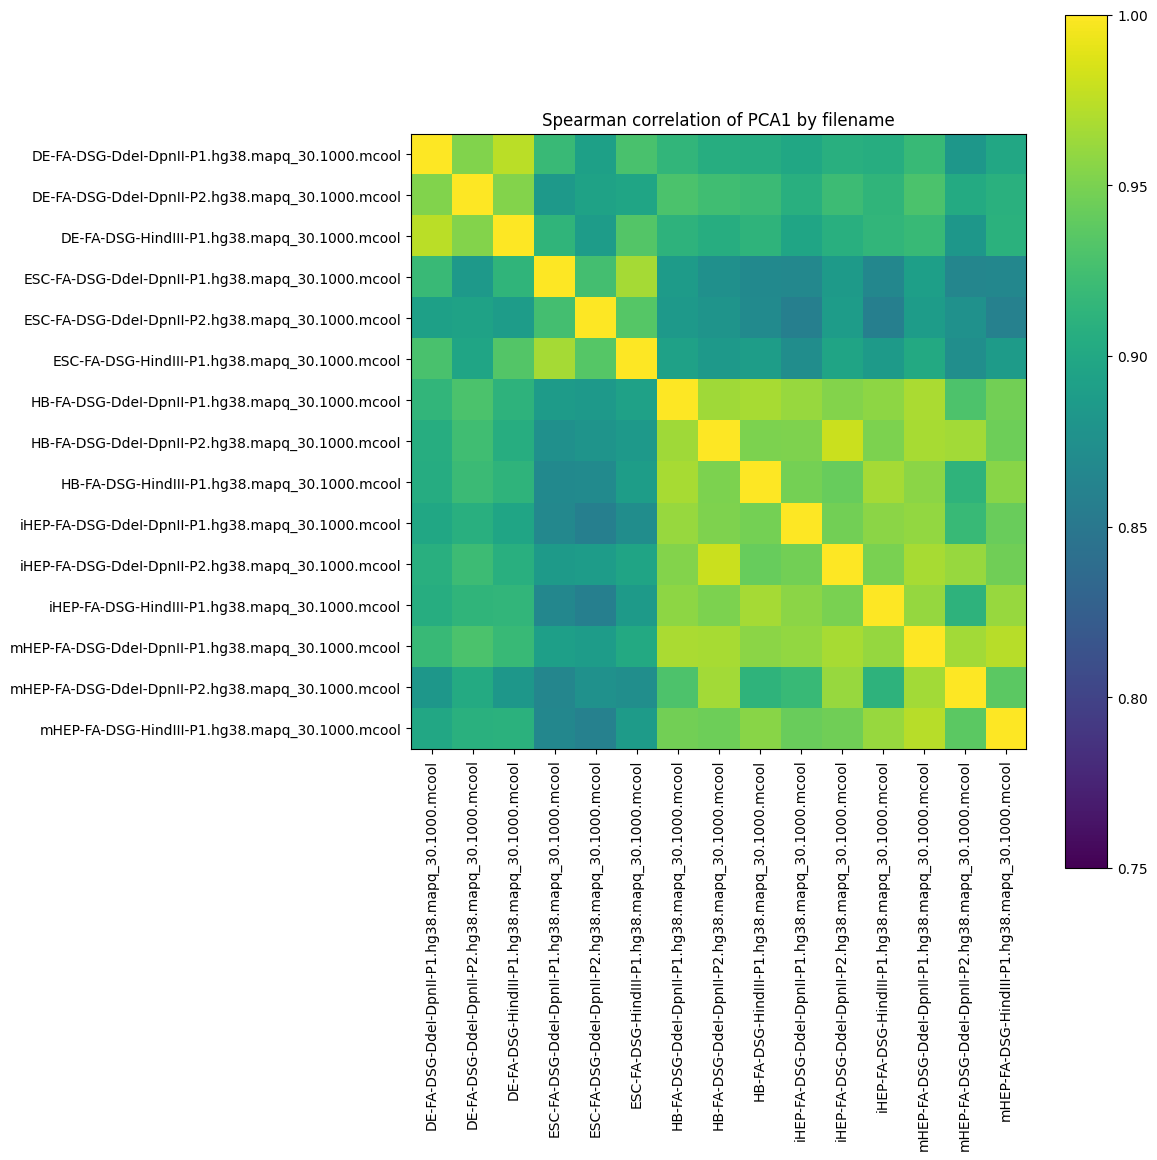

In [14]:
pearson, spearman = correlation_heatmaps(subset, index="bin_name", value_col="PCA1", group_col="filename")